<h3>Importing Libraries</h3>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, models, transforms
%matplotlib inline

<h3>Preparing dataset</h3>

In [32]:
sample_submission = pd.read_csv("sample_submission.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv(r"train.csv",dtype = np.float32)

In [33]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
test.head()

AttributeError: 'TensorDataset' object has no attribute 'head'

In [34]:
#Now, splitting data 
targets_numpy = train.label.values
#Normalisation:
features_numpy = train.loc[:,train.columns != "label"].values/255

In [35]:
targets_numpy.shape, features_numpy.shape

((42000,), (42000, 784))

<h5>Train Test Split</h5>

In [36]:
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,targets_numpy,test_size = 0.2) 


In [37]:
features_train.shape, targets_train.shape

((33600, 784), (33600,))

In [38]:
#we need variable to accumulate gradients
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

#again, for the test set
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

In [39]:
 featuresTest.shape, targetsTest.shape

(torch.Size([8400, 784]), torch.Size([8400]))

In [40]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)


<h5>We need to make the dataset iterable</h5>

In [61]:
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)


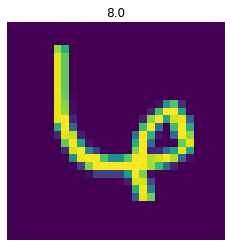

In [77]:
#Visualising data
plt.imshow(features_numpy[89].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.show()

<h3>Simple Logistic Regression Model</h3>

<h5>Creating the model class</h5>

In [42]:
#First, Instantiating
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

class LogisticRegression(nn.Module): 
    def __init__(self, input_size, num_classes): 
        super(LogisticRegression, self).__init__() 
        self.linear = nn.Linear(input_size, num_classes) 
  
    def forward(self, x): 
        out = self.linear(x) 
        return out 


In [43]:
#defining the model
model = LogisticRegression(input_size, num_classes)
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) 


<h5>Training the Model </h5>

In [44]:

for epoch in range(num_epochs): 
    for i, (images, labels) in enumerate(train_loader): 
        images = Variable(images.view(-1, 28 * 28)) 
        labels = Variable(labels) 
        optimizer.zero_grad() 
        outputs = model(images) 
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step() 
  
        if (i + 1) % 100 == 0: 
            print('Epoch: % d, Step: % d/% d, Loss: %.4f' %(epoch + 1, i + 1,len(train) // batch_size, loss.data)) 


Epoch:  1, Step:  100/ 336, Loss: 2.2038
Epoch:  1, Step:  200/ 336, Loss: 2.1479
Epoch:  1, Step:  300/ 336, Loss: 1.9821
Epoch:  2, Step:  100/ 336, Loss: 1.8942
Epoch:  2, Step:  200/ 336, Loss: 1.8693
Epoch:  2, Step:  300/ 336, Loss: 1.6909
Epoch:  3, Step:  100/ 336, Loss: 1.6587
Epoch:  3, Step:  200/ 336, Loss: 1.6518
Epoch:  3, Step:  300/ 336, Loss: 1.4692
Epoch:  4, Step:  100/ 336, Loss: 1.4783
Epoch:  4, Step:  200/ 336, Loss: 1.4815
Epoch:  4, Step:  300/ 336, Loss: 1.2992
Epoch:  5, Step:  100/ 336, Loss: 1.3393
Epoch:  5, Step:  200/ 336, Loss: 1.3469
Epoch:  5, Step:  300/ 336, Loss: 1.1675


In [ ]:
#We can see that the validation loss is decreasing as the epochs are increasing. 

In [45]:
# Testing the Model:
correct = 0
total = 0
for images, labels in test_loader: 
    images = Variable(images.view(-1, 28 * 28)) 
    outputs = model(images) 
    _, predicted = torch.max(outputs.data, 1) 
    total += labels.size(0) 
    correct += (predicted == labels).sum() 
accuracy = (100 * correct / total)
print('Accuracy of the model on the test images: % d %%' %accuracy ) 


Accuracy of the model on the test images:  80 %


<h3>CNN Model</h3>

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [47]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU() 
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        return out




In [48]:
#Instantiating
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
#Defining the model 
model = CNNModel()
error = nn.CrossEntropyLoss()
#Instantiating optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [49]:
import math

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.utils import make_grid

if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()

In [53]:
#Instantiating
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

<h5>Training the model</h5>

In [56]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(train)
        
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()

        count += 1
        if count % 50 == 0:      
            correct = 0
            total = 0
            for images, labels in test_loader:
#testing the model
                test = Variable(images.view(100,1,28,28))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
#Finally, checking the accuracy
            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 200 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.1854531317949295  Accuracy: 96.04762268066406 %
Iteration: 1000  Loss: 0.041736751794815063  Accuracy: 97.32142639160156 %
Iteration: 1500  Loss: 0.03102852590382099  Accuracy: 97.91666412353516 %
Iteration: 2000  Loss: 0.00856619980186224  Accuracy: 97.97618865966797 %


In [57]:
#We can see that the validation loss is decreasing as the epochs are increasing. 

<h3>Generating predictions for the test set</h3>



In [82]:
def prediciton(data_loader):
    model.eval()
    test_pred = torch.LongTensor()
    
    for data in enumerate(data_loader):
        data = Variable(data, volatile=True)
        if torch.cuda.is_available():
            data = data.cuda()
            
        output = model(data)
        
        pred = output.cpu().data.max(1, keepdim=True)[1]
        test_pred = torch.cat((test_pred, pred), dim=0)
        
    return test_pred


In [83]:
test_pred = prediciton(test_loader)



/home/somayaji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  


TypeError: Variable data has to be a tensor, but got tuple

In [ ]:

out_df = pd.DataFrame(np.c_[np.arange(1, len(test)+1)[:,None], test_pred.numpy()], 
                      columns=['ImageId', 'Label'])

out_df.head()


In [81]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)



AttributeError: 'CNNModel' object has no attribute 'predict'

In [85]:
test_df = pd.read_csv("test.csv")

In [86]:
test_df.values.shape

(28000, 784)

In [87]:
test_tensor = torch.tensor(test_df.values, dtype=torch.float) / 255
test_tensor = test_tensor.view(-1, 1, 28, 28)


In [ ]:

outputs = model(test_tensor)
_, predicted = torch.max(outputs, 1)
submit_df = pd.DataFrame({'ImageId': np.arange(1, 28001), 'Label': predicted.numpy()})



In [ ]:

submit_df.to_csv('CNN.csv', index=False)
